# Лабораторная 2. Упражнение 1. Вариант 22
## Импорты

In [5]:
import math
from math import pi

from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector


simulator = AerSimulator()


def print_circuit_cf(qc: QuantumCircuit):
    def calc_cf():
        state = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
        max_len = state.num_qubits
        
        return {
            '0' * (max_len - len(bin(i)) + 2) + bin(i)[2:]: amplitude
            for i, amplitude in enumerate(state.data)
        }
    
    print(*[f"|{k}> : {v}" for (k, v) in calc_cf().items()], sep='\n')

1. Соберите схему для получения запутанного состояния квантовой системы из двух кубитов $\frac{1}{\sqrt{2}}(|00> - |11>)$. Выполните симуляцию работы схемы. Получите математическое обоснование результата.

Про state vector - вероятности нахождения кубитов в некотором состоянии (|$00 \rangle, |01\rangle $ и т.д.)  
Применение гейтов H и CX приводит к состоянию Белла:
- Первые два кубита кет-вектора установлены в ноль 
> |00⟩ = $ \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} $
- А как вентиль Адамара выглядит?  
$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$   
- **H**|0$\rangle  = \frac{1}{\sqrt{2}}(|0 \rangle + |1 \rangle)$ - применяем вентиль Адамара к первому кубиту
    - Итоговый вид с учётом второго кубита:  
        - $\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes |0\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle)$
 
- **CNOT** связывает кубиты $\frac{1}{\sqrt{2}}(|00 \rangle + |11 \rangle)$  - XOR каждого кубита с учётом того, что сейчас в кет-векторе на втором месте по сути стоит 0. Если первый кубит 1, второй инвертируется.   
    - Итого: мы предполагаем, что второй кубит в нуле у второго кет-вектора. Поэтому он инвертируется в единицу.
- **Z** - смена знака  
    - А он как работает? Если кубит в единице, он станет отрицательным -> **Z**($|1 \rangle)$ &#8658; -$|1\rangle$
Получаем $|00\rangle - |11 \rangle$

|00> : (0.7071067811865475+0j)
|01> : 0j
|10> : 0j
|11> : (-0.7071067811865475+0j)


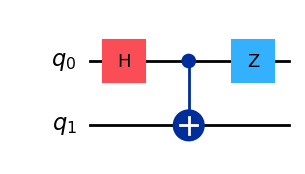

In [6]:
qc = QuantumCircuit(2)
qc.h(0) 
qc.cx(0, 1) 
qc.z(0)
print_circuit_cf(qc)
qc.draw('mpl')

2. Соберите схему для получения запутанного состояния квантовой системы из двух кубитов $\frac{1}{\sqrt{2}}(|00> + |11>)$. Выполните симуляцию работы схемы. Получите математическое обоснование результата.

- Шаги аналогичные предыдущему заданию, только без изменения знака (операции Z)

|00> : (0.7071067811865475+0j)
|01> : 0j
|10> : 0j
|11> : (0.7071067811865475+0j)


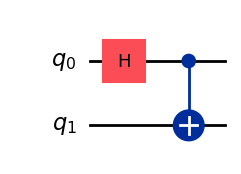

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
print_circuit_cf(qc)
qc.draw('mpl')

3. Соберите схему для получения запутанного состояния квантовой системы из двух кубитов $\frac{1}{\sqrt{2}}(|01> - |10>)$. Выполните симуляцию работы схемы. Получите математическое обоснование результата.

- Устанавливаем первые два кубита в ноль.
- Применяем логическое NOT ко второму кубиту, инвертируя его. Это выполняет вентиль X.
<p align="left">
X(|q<sub>0</sub>, q<sub>1</sub>⟩) = |01⟩ = $ \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} $
</p>   
- Применяем вентиль Адамара
- CNOT к обоим кубитам 
- Вентиль Z() меняет знак кубита
$$H =\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$ 

|00> : 0j
|01> : (-0.7071067811865475+0j)
|10> : (0.7071067811865475+0j)
|11> : 0j


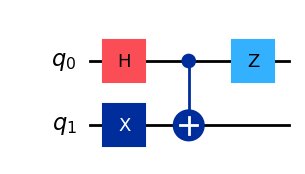

In [8]:
qc = QuantumCircuit(2)
qc.x(1) 
qc.h(0)
qc.cx(0, 1)
qc.z(0)
print_circuit_cf(qc)
qc.draw('mpl')

4. Соберите схему для получения запутанного состояния квантовой системы из двух кубитов $\frac{1}{\sqrt{2}}(|01> + |10>)$. Выполните симуляцию работы схемы. Получите математическое обоснование результата.

|00> : 0j
|01> : (0.7071067811865475+0j)
|10> : (0.7071067811865475+0j)
|11> : 0j


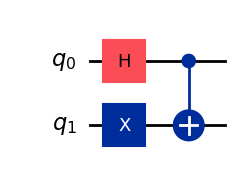

In [9]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
print_circuit_cf(qc)
qc.draw('mpl')

5. Соберите схему для получения запутанного состояния квантовой системы из двух кубитов. Выполните симуляцию работы схемы. Получите математическое обоснование результата.
> Состояние кубитов: a|00> - b|11>:
$|a|^2 = 15\\ |b|^2 = 85$

Здесь применяется вращение на угол $2 \cdot \arccos(\theta)$
$$R_y(\theta) = 
\begin{bmatrix} 
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\ 
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) 
\end{bmatrix} $$  
Остальные шаги ранее описаны

|00> : (-0.4743416490252569+0j)
|01> : (-0.4743416490252569+0j)
|10> : (0.5244044240850757+0j)
|11> : (-0.5244044240850757+0j)


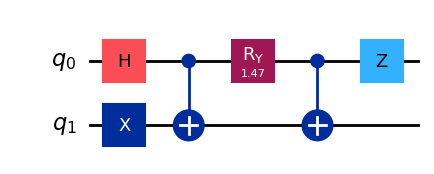

In [10]:
a, b = math.sqrt(0.55), math.sqrt(0.45)

qc = QuantumCircuit(2)
qc.x(1)  
qc.h(0) 
qc.cx(0, 1)  
qc.ry(2 * math.acos(a), 0)  
qc.cx(0, 1)
qc.z(0)
print_circuit_cf(qc)
qc.draw('mpl')

6. Соберите схему для получения запутанного состояния квантовой системы из трех кубитов a|010> + b|111>. Выполните симуляцию работы схемы. Получите математическое обоснование результата.

Устанавливаем начальное состояние кубитов в $|000\rangle$    

Применяем X ко второму кубиту:  
<p align="left">
|010⟩ = $ \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} $
</p>  

Применяется вращение на угол $2 \cdot arccos(\theta)$  
$R_y(\theta) = 
\begin{bmatrix} 
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\ 
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) 
\end{bmatrix} $   <br> <br>
**CCX** - Toffoli, вентиль с двумя управляемыми кубитами. Для изменения 3 кубита первые два будут должны быть установлены в единицу.  
$|110 \rangle$ &#8658; $|111\rangle$



In [10]:
a, b = math.sqrt(0.6), math.sqrt(0.4)  

qc = QuantumCircuit(3)
qc.x(1)  
qc.ry(2 * math.acos(a), 0)  
qc.ccx(0, 1, 2)
print_circuit_cf(qc)
qc.draw('mpl')

7. Соберите схему для получения запутанного состояния квантовой системы из двух кубитов $\alpha|00> + \beta|01> + \gamma|11>$. Выполните симуляцию работы схемы. Получите математическое обоснование результата.

$$|\alpha|^2 = 50\\|\beta|^2 = 20\\|\gamma|^2 = 30$$

- alpha, beta, gamma - вероятности для состояний $|00\rangle, |01\rangle, |11\rangle$ . 
- Применяется вентиль вращения вокруг оси Y $R(\theta)$на первом кубите (кубит 0). Вращение происходит на угол 2*arccos($\alpha$). Этот вентиль изменяет амплитуду первого кубита, чтобы достичь состояния $|00\rangle$ или $|01\rangle$ в зависимости от значения $\alpha$. Мы используем формулу для угла вращения $\theta = 2* \arccos($\\alpha$)$, чтобы соответствовать амлитуде $\alpha$ для состояния $|00\rangle$.  
- Применяется вентиль вращения $R_{y}$ для второго кубита. Мы устанавливаем амплитуду для второго кубита с помощью угла $\theta = 2$. arccos($\frac{\beta}{\sqrt{\beta^{2}+\gamma^{2}}}$). Это делается для того, чтобы настроить вероятности для состояний $|01 \rangle и |11\rangle$, где амплитуды  $\beta и \gamma$ зависят от этой величины.


In [10]:
alpha, beta, gamma = math.sqrt(0.35), math.sqrt(0.15), math.sqrt(0.5) 
norm = math.sqrt(alpha**2 + beta**2 + gamma**2) 
alpha, beta, gamma = alpha / norm, beta / norm, gamma / norm

qc = QuantumCircuit(2)
qc.ry(2 * math.acos(alpha), 0)  
qc.cx(0, 1)  
qc.ry(2 * math.acos(beta / math.sqrt(beta**2 + gamma**2)), 1)  
print_circuit_cf(qc)
qc.draw('mpl')
